# Laptop price predictor

In [158]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# dataset summary and eda
data = pd.read_csv('data/laptop.csv')
print(data.head())
print(data.info())
print(data.describe())

   Unnamed: 0                                     model_name   brand  \
0           0            Lenovo V15 ITL G2 82KBA033IH Laptop  Lenovo   
1           1          HP Pavilion 15-ec2004AX Gaming Laptop      HP   
2           2                   Lenovo V15 82KBA03HIH Laptop  Lenovo   
3           3  Asus Vivobook 16X 2022 M1603QA-MB502WS Laptop    Asus   
4           4                         HP 15s-fr4000TU Laptop      HP   

      processor_name  ram(GB)  ssd(GB)  Hard Disk(GB) Operating System  \
0   11th Gen Core i3        8      512              0          Windows   
1  AMD Ryzen 5 5600H        8      512              0          Windows   
2   11th Gen Core i3        8      256           1000          Windows   
3      Ryzen 5-5600H        8      512              0          Windows   
4   11th Gen Core i5        8      512              0          Windows   

                       graphics  screen_size(inches) resolution (pixels)  \
0          Intel Integrated UHD               

In [159]:
# rename columns
data = data.rename(columns={'processor_name': 'processor', 'Hard Disk(GB)': 'hdd(GB)', 'Operating System': 'os', 'graphics' : 'gpu', 'resolution (pixels)': 'resolution(pixels)'})

# Drop unnecessary columns
data = data.drop(columns=['Unnamed: 0', 'model_name'], errors='ignore')

print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   brand                1014 non-null   object 
 1   processor            1014 non-null   object 
 2   ram(GB)              1014 non-null   int64  
 3   ssd(GB)              1014 non-null   int64  
 4   hdd(GB)              1014 non-null   int64  
 5   os                   1014 non-null   object 
 6   gpu                  1014 non-null   object 
 7   screen_size(inches)  1012 non-null   float64
 8   resolution(pixels)   1011 non-null   object 
 9   no_of_cores          1014 non-null   int64  
 10  no_of_threads        1014 non-null   int64  
 11  spec_score           1014 non-null   int64  
 12  price                1014 non-null   int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 103.1+ KB
None


In [160]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import json

# Fill missing values
for col in data.columns:
    if data[col].dtype == 'object':
        data[col] = data[col].fillna(data[col].mode()[0])
    else:
        data[col] = data[col].fillna(data[col].median())

# Define categorical columns
categorical_cols = ['brand', 'processor', 'os', 'gpu', 'resolution(pixels)']
categorical_cols = [col for col in categorical_cols if col in data.columns]

# Create a dictionary to store mappings
label_mappings = {}

# Apply Label Encoding
for col in categorical_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    # Convert numpy.int64 to native int for JSON
    mapping = {str(orig): int(enc) for orig, enc in zip(le.classes_, le.transform(le.classes_))}
    label_mappings[col] = mapping

# Save mapping to JSON
with open('label_mappings.json', 'w') as f:
    json.dump(label_mappings, f, indent=4)

# Save cleaned data
data.to_csv('data/laptop_cleaned.csv', index=False)

# Optional: print GPU mapping
print("GPU Mapping:", label_mappings.get('gpu', {}))

GPU Mapping: {'10 Core GPU': 0, '10-Core GPU': 1, '10\u2009GB AMD Radeon RX 6700M': 2, '12\u2009GB AMD Radeon RX 6800M': 3, '12\u2009GB NVIDIA GeForce RTX A3000': 4, '14-Core GPU': 5, '16-core GPU': 6, '16\u2009GB NVIDIA GEFORCE RTX 3080': 7, '16\u2009GB NVIDIA GeForce 3080Ti': 8, '16\u2009GB NVIDIA GeForce RTX 3080': 9, '16\u2009GB NVIDIA GeForce RTX 3080 Ti': 10, '16\u2009GB NVIDIA GeForce RTX 3080Ti': 11, '16\u2009GB NVIDIA GeForce RTX A5500': 12, '16\u2009GB NVIDIA GeForce RTX RTX 3080 Ti': 13, '19-core GPU': 14, '2\u2009GB NVIDIA GeForce MX330': 15, '2\u2009GB NVIDIA GeForce MX350': 16, '2\u2009GB NVIDIA GeForce MX450': 17, '2\u2009GB NVIDIA GeForce MX550': 18, '2\u2009GB NVIDIA GeForce MX570': 19, '2\u2009GB NVIDIA Geforce MX450': 20, '2\u2009GB NVIDIA MX350': 21, '2\u2009GB NVIDIA MX450': 22, '2\u2009GB NVIDIA MX550': 23, '2\u2009GB NVIDIA MX550 Graphics': 24, '2\u2009GB Nvidia MX550 Graphics': 25, '2\u2009GB Radeon RX 550': 26, '30-core GPU': 27, '32-core GPU': 28, '38-core GPU

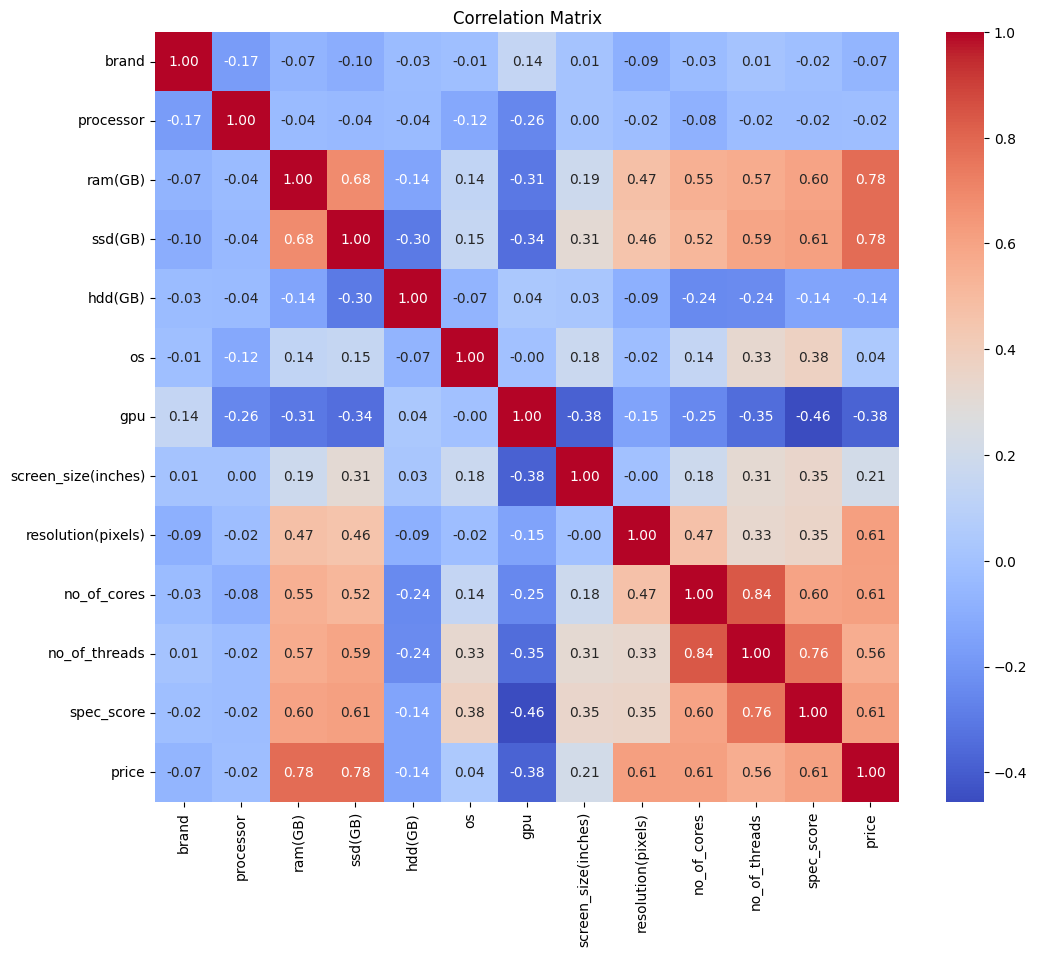

In [161]:
# correlation matrix
plt.figure(figsize=(12,10))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

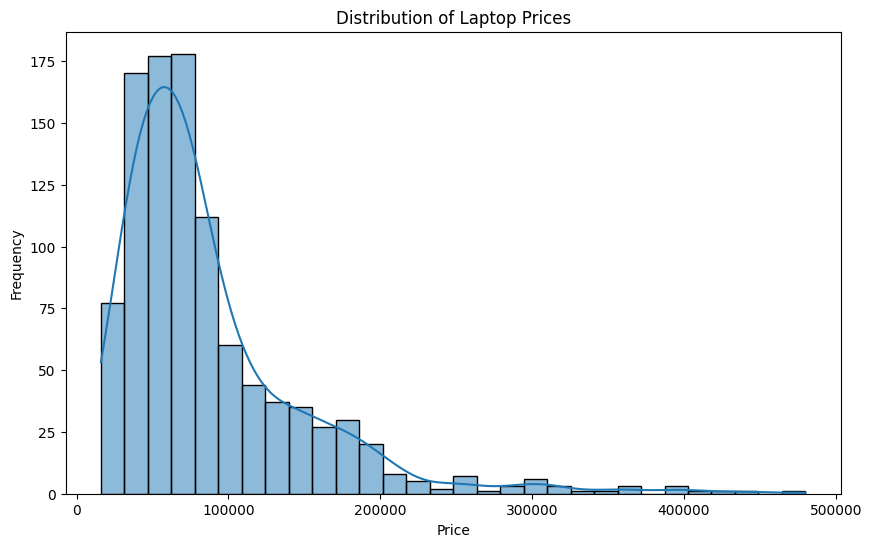

In [162]:
# exploratory data analysis
plt.figure(figsize=(10,6))
sns.histplot(data['price'], bins=30, kde=True)
plt.title('Distribution of Laptop Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

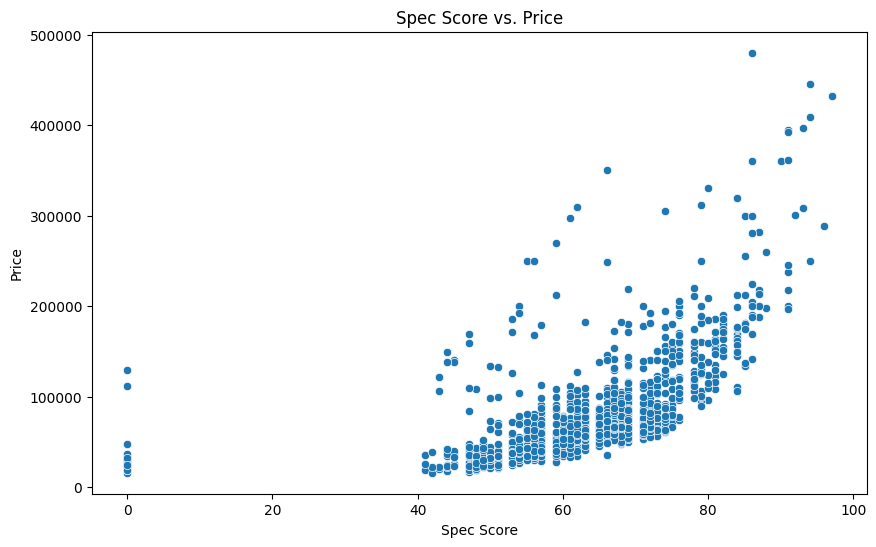

In [163]:
# distribution of spec_score vs. price
plt.figure(figsize=(10,6))
sns.scatterplot(x='spec_score', y='price', data=data)
plt.title('Spec Score vs. Price')
plt.xlabel('Spec Score')
plt.ylabel('Price')
plt.show()

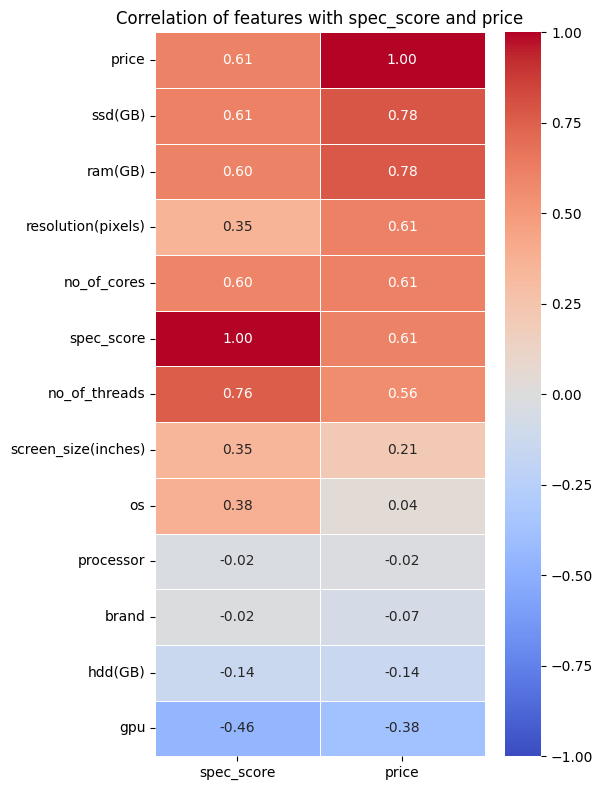

In [164]:
corr_target = data.corr()[['spec_score', 'price']].sort_values(by='price', ascending=False)

plt.figure(figsize=(6, 8))
sns.heatmap(corr_target, annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1, linewidths=0.5)
plt.title("Correlation of features with spec_score and price")
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

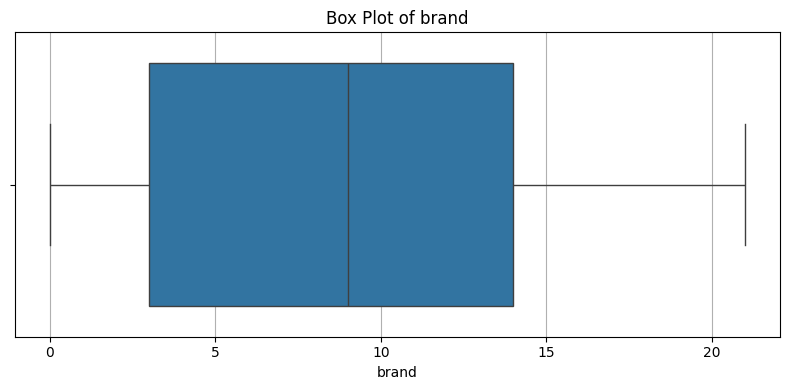

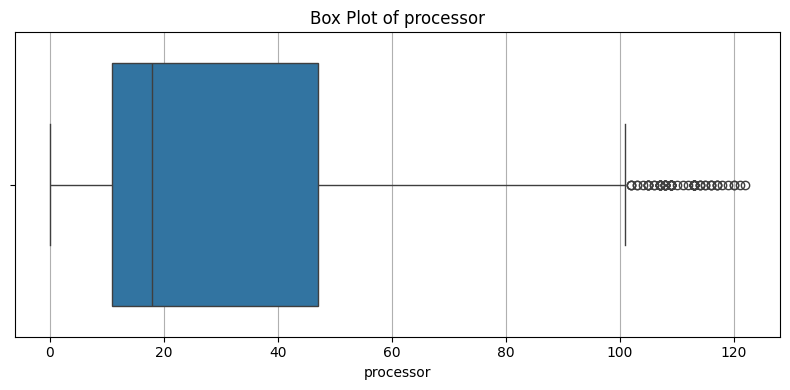

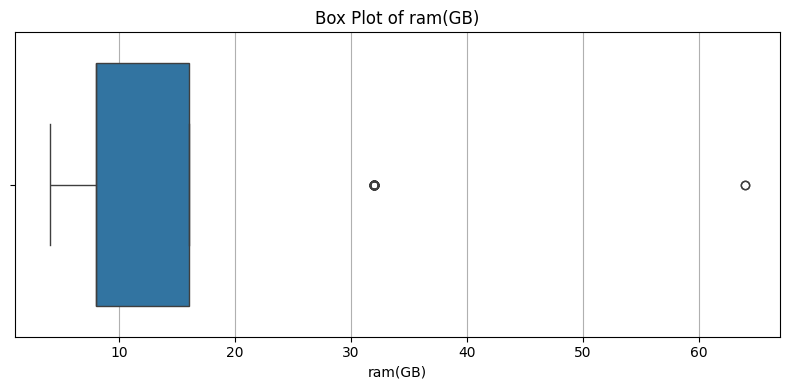

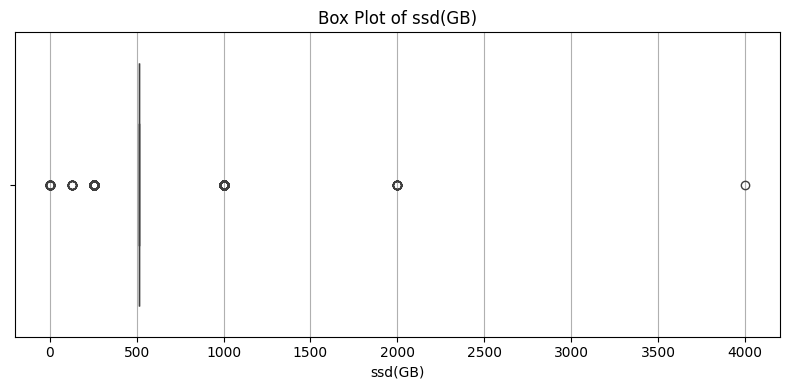

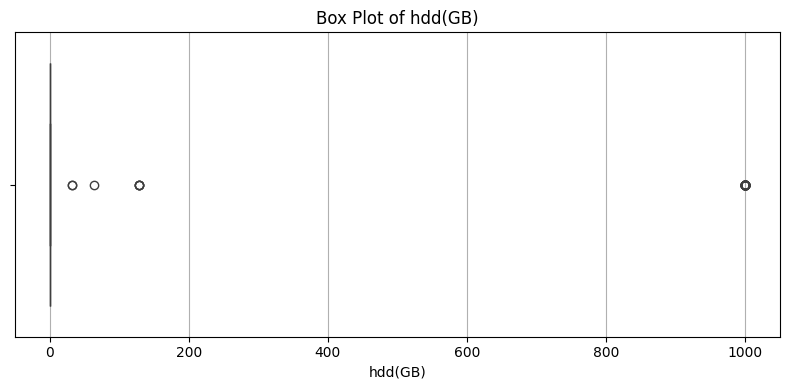

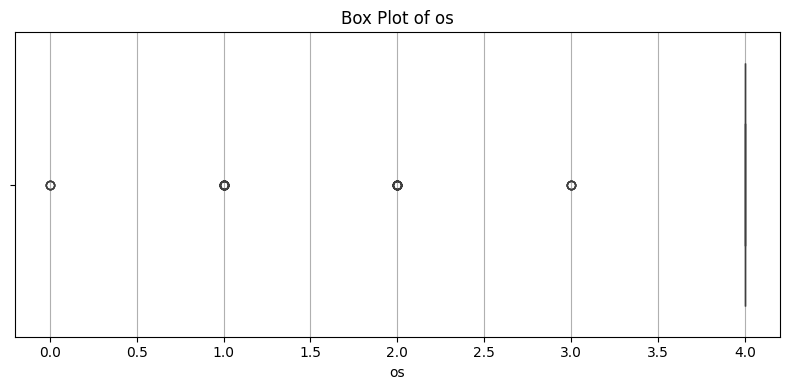

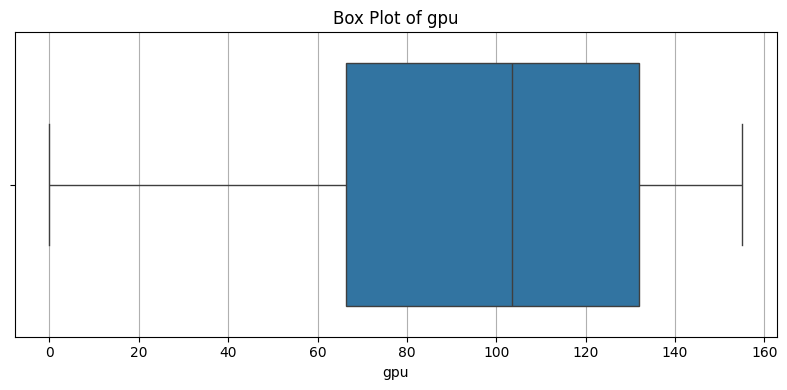

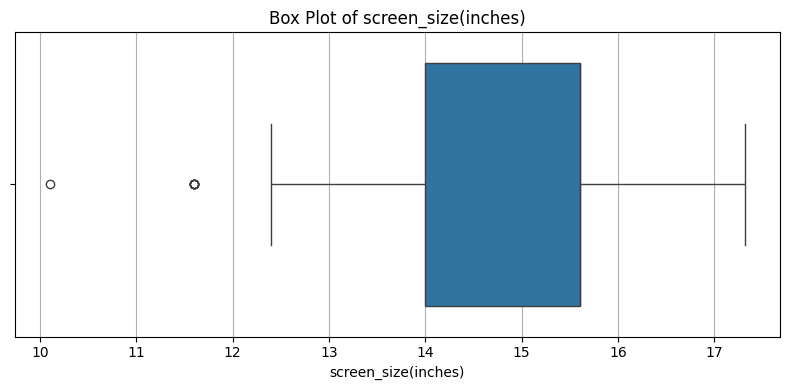

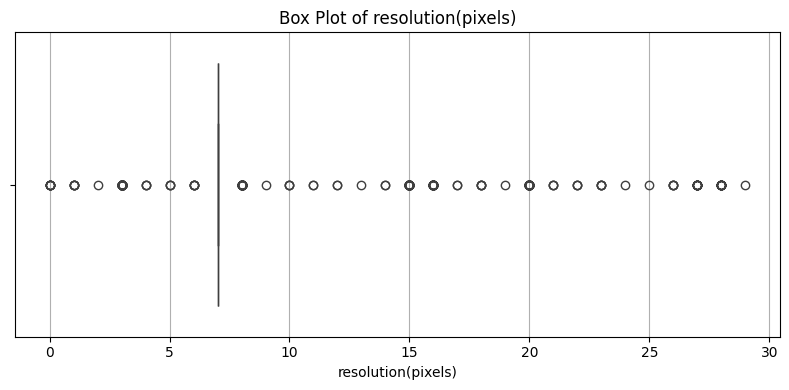

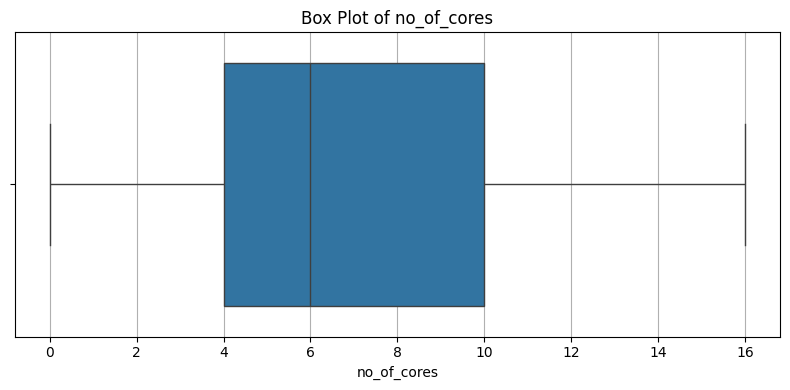

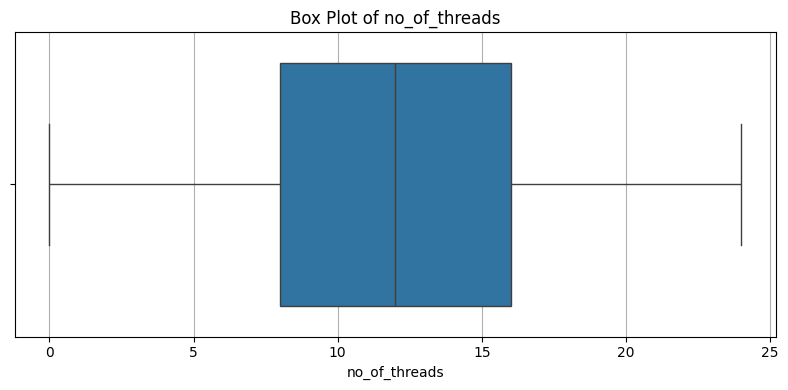

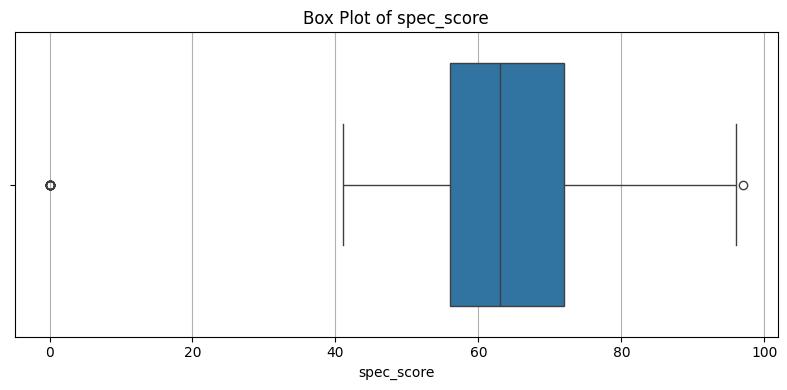

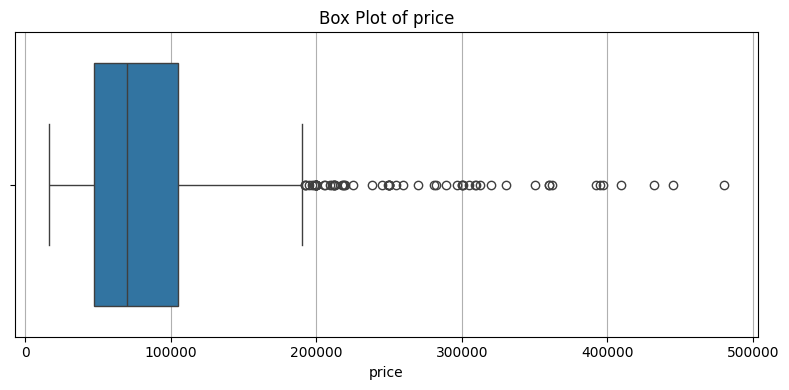

In [165]:
# Box plot for each feature
for column in data.select_dtypes(include=[np.number]).columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=data[column])
    plt.title(f'Box Plot of {column}')
    plt.xlabel(column)
    plt.grid(axis='x')
    plt.tight_layout()
    plt.show()

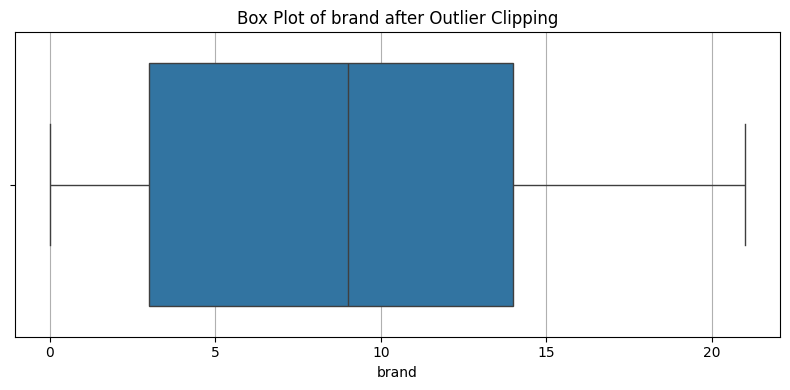

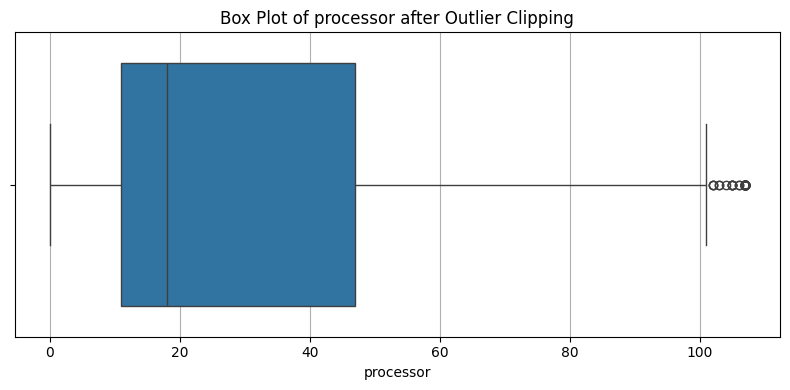

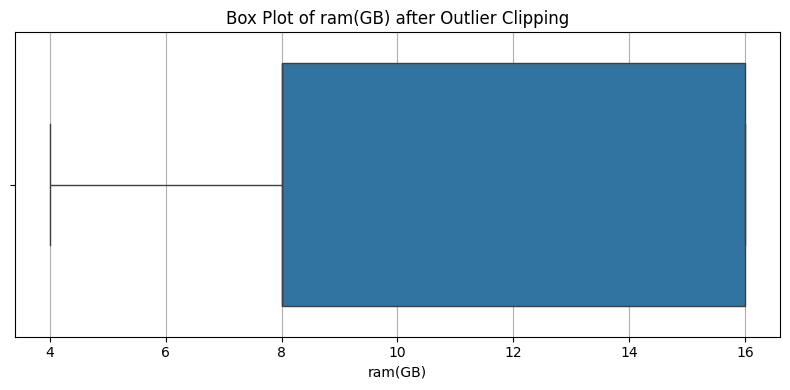

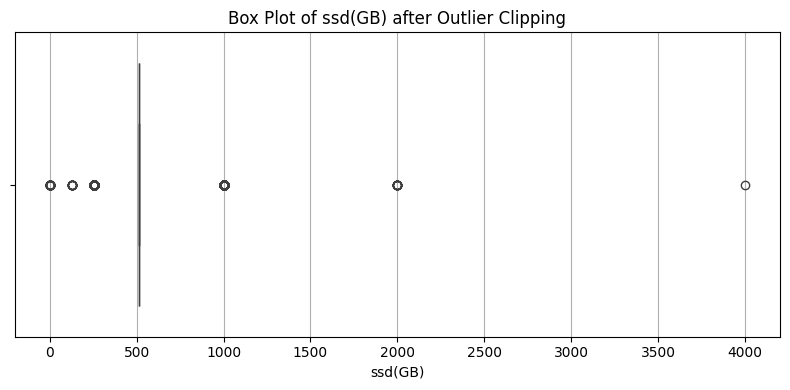

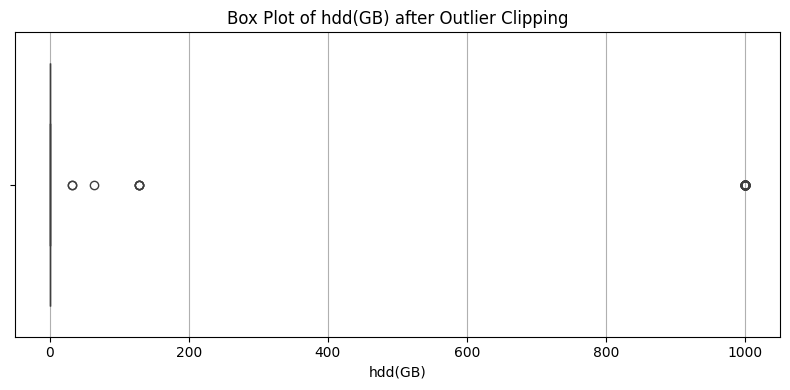

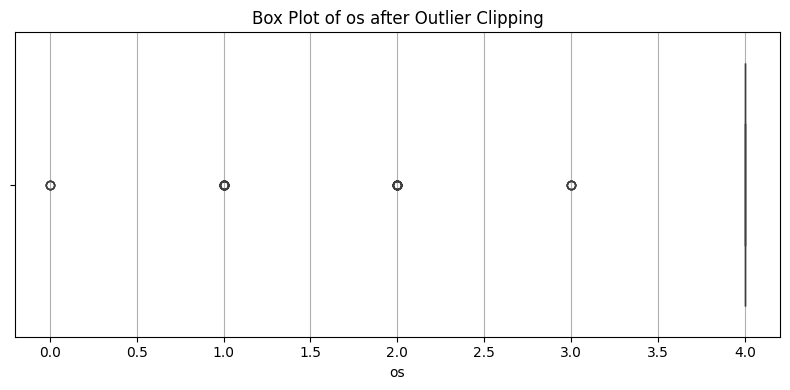

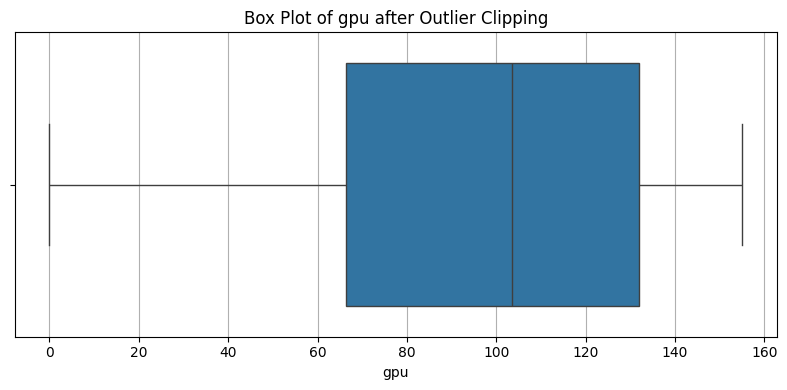

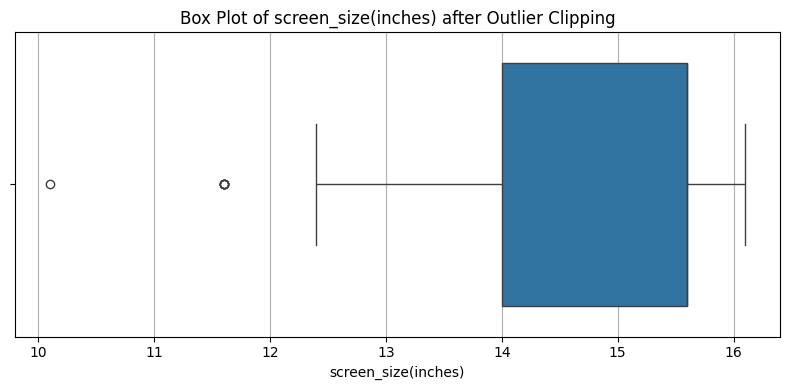

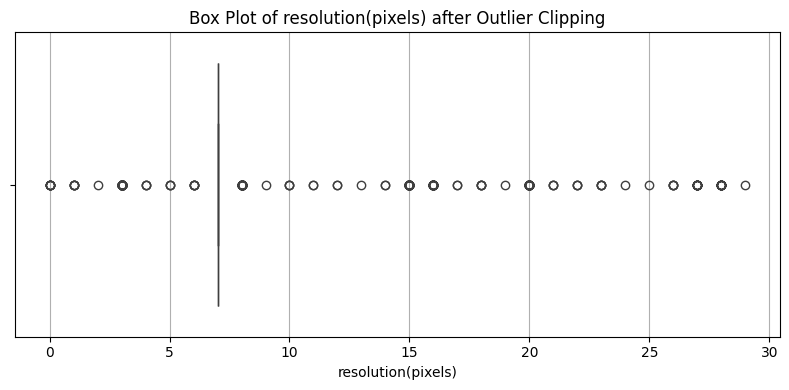

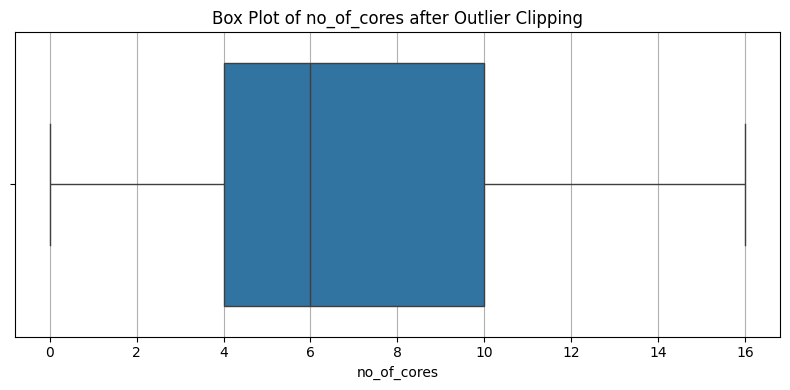

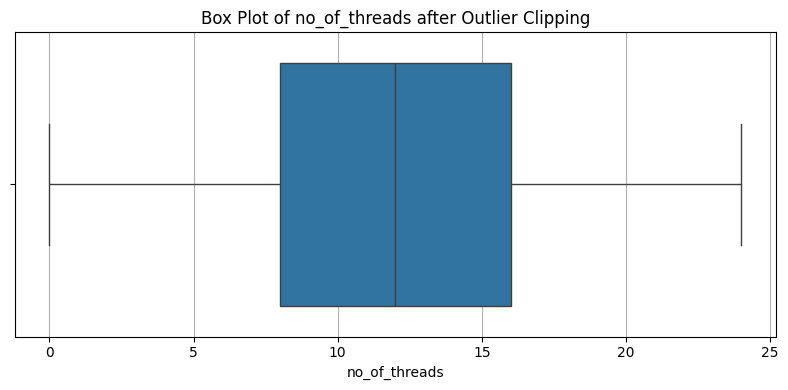

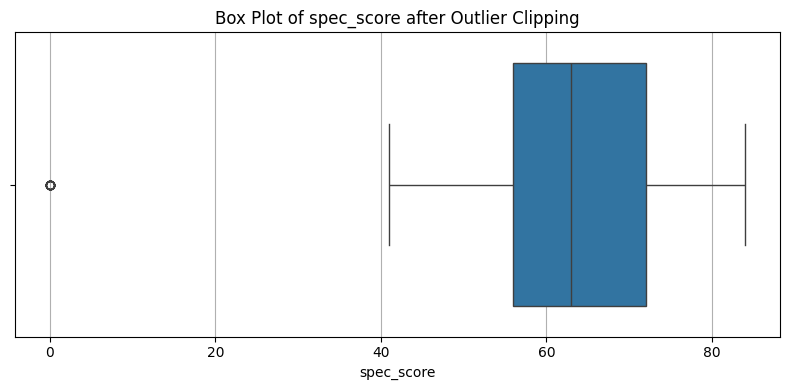

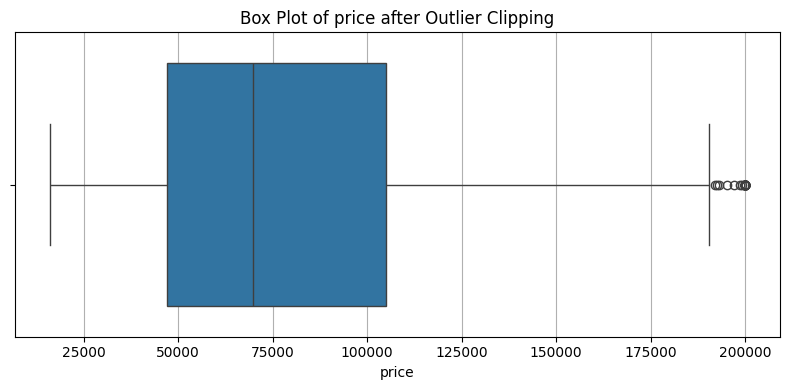

In [166]:
# clipping outliers in processor, ram(GB), screen_size(inches), spec_score, price
data['processor'] = data['processor'].clip(0, data['processor'].quantile(0.95))
data['ram(GB)'] = data['ram(GB)'].clip(0, data['ram(GB)'].quantile(0.95))
data['screen_size(inches)'] = data['screen_size(inches)'].clip(0, data['screen_size(inches)'].quantile(0.95))
data['spec_score'] = data['spec_score'].clip(0, data['spec_score'].quantile(0.95))
data['price'] = data['price'].clip(0, data['price'].quantile(0.95))

# display updated box plots after outlier clipping
for column in data.select_dtypes(include=[np.number]).columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=data[column])
    plt.title(f'Box Plot of {column} after Outlier Clipping')
    plt.xlabel(column)
    plt.grid(axis='x')
    plt.tight_layout()
    plt.show()

In [167]:
# drop ssd(GB), hdd(GB), os, resolution(pixels),  columns
data = data.drop(columns=['ssd(GB)', 'hdd(GB)', 'os', 'resolution(pixels)'], errors='ignore')
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   brand                1014 non-null   int64  
 1   processor            1014 non-null   int64  
 2   ram(GB)              1014 non-null   int64  
 3   gpu                  1014 non-null   int64  
 4   screen_size(inches)  1014 non-null   float64
 5   no_of_cores          1014 non-null   int64  
 6   no_of_threads        1014 non-null   int64  
 7   spec_score           1014 non-null   int64  
 8   price                1014 non-null   float64
dtypes: float64(2), int64(7)
memory usage: 71.4 KB
None


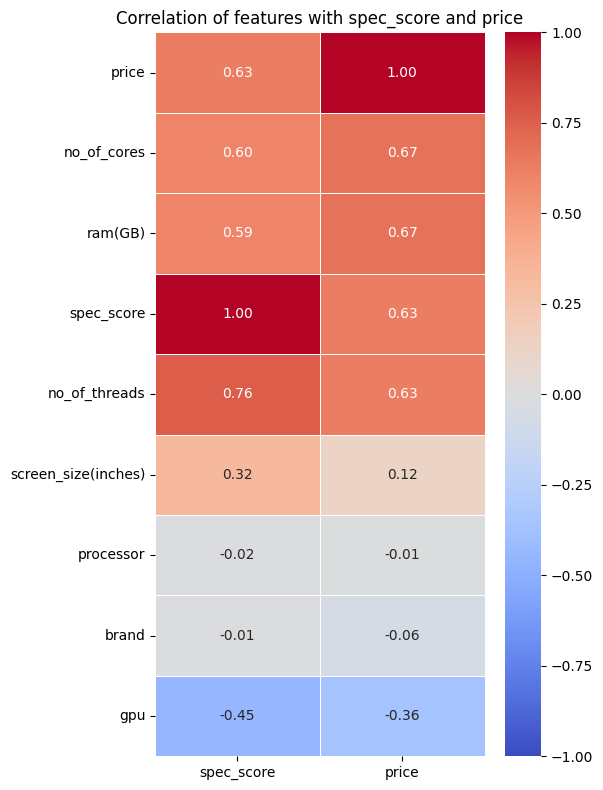

In [168]:
corr_target = data.corr()[['spec_score', 'price']].sort_values(by='price', ascending=False)

plt.figure(figsize=(6, 8))
sns.heatmap(corr_target, annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1, linewidths=0.5)
plt.title("Correlation of features with spec_score and price")
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [169]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

# -----------------------------
# 1️⃣ Define features per target
# -----------------------------
spec_features = ['gpu', 'screen_size(inches)', 'no_of_threads', 'ram(GB)', 'no_of_cores']
price_features = ['gpu', 'no_of_threads', 'ram(GB)', 'no_of_cores']

# -----------------------------
# 2️⃣ Prepare datasets
# -----------------------------
X_spec = data[spec_features]
y_spec = data['spec_score']

X_price = data[price_features]
y_price = data['price']

# Split both
X_spec_train, X_spec_test, y_spec_train, y_spec_test = train_test_split(X_spec, y_spec, test_size=0.2, random_state=42)
X_price_train, X_price_test, y_price_train, y_price_test = train_test_split(X_price, y_price, test_size=0.2, random_state=42)

# -----------------------------
# 3️⃣ Define models
# -----------------------------
models = {
    "LinearRegression": LinearRegression(),
    "RandomForest": RandomForestRegressor(n_estimators=200, random_state=0, n_jobs=-1),
    "GradientBoosting": GradientBoostingRegressor(n_estimators=200, random_state=0),
    "KNeighbors": KNeighborsRegressor(n_neighbors=5)
}

# -----------------------------
# 4️⃣ Train + Evaluate
# -----------------------------
results = []

for name, model in models.items():
    # spec_score model
    spec_pipe = Pipeline([
        ("scaler", StandardScaler()),
        ("estimator", model)
    ])
    spec_pipe.fit(X_spec_train, y_spec_train)
    y_spec_pred = spec_pipe.predict(X_spec_test)

    # price model
    price_pipe = Pipeline([
        ("scaler", StandardScaler()),
        ("estimator", model)
    ])
    price_pipe.fit(X_price_train, y_price_train)
    y_price_pred = price_pipe.predict(X_price_test)

    # Metrics
    rmse_spec = mean_squared_error(y_spec_test, y_spec_pred)
    rmse_price = mean_squared_error(y_price_test, y_price_pred)
    r2_spec = r2_score(y_spec_test, y_spec_pred)
    r2_price = r2_score(y_price_test, y_price_pred)

    results.append({
        "model": name,
        "rmse_spec_score": rmse_spec,
        "r2_spec_score": r2_spec,
        "rmse_price": rmse_price,
        "r2_price": r2_price,
        "rmse_mean": np.mean([rmse_spec, rmse_price]),
        "r2_mean": np.mean([r2_spec, r2_price])
    })

# -----------------------------
# 5️⃣ Display comparison
# -----------------------------
res_df = pd.DataFrame(results).sort_values("rmse_mean")
print(res_df)


              model  rmse_spec_score  r2_spec_score    rmse_price  r2_price  \
1      RandomForest        50.165104       0.736329  4.895928e+08  0.786253   
2  GradientBoosting        48.076055       0.747309  4.910152e+08  0.785632   
3        KNeighbors        73.254778       0.614969  5.479806e+08  0.760761   
0  LinearRegression        78.166966       0.589150  9.194218e+08  0.598597   

      rmse_mean   r2_mean  
1  2.447964e+08  0.761291  
2  2.455076e+08  0.766470  
3  2.739903e+08  0.687865  
0  4.597109e+08  0.593873  


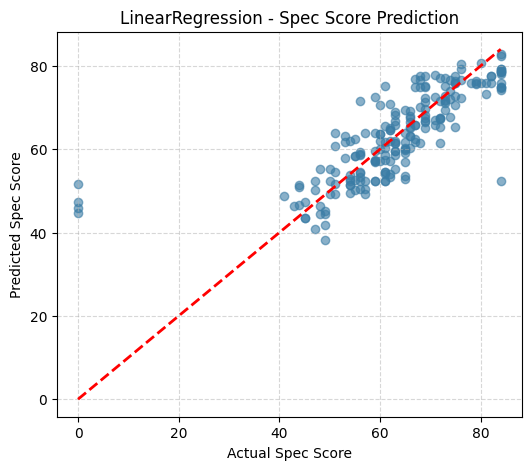

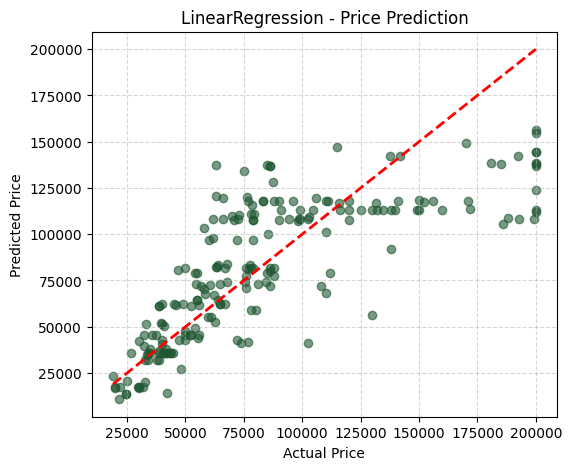

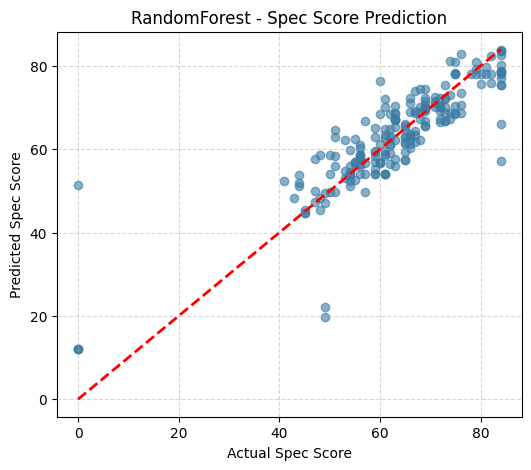

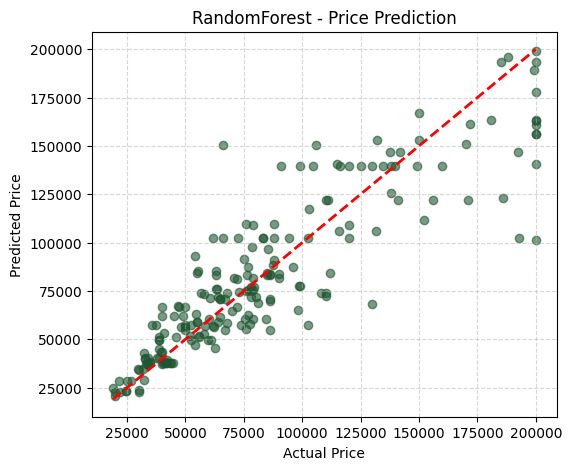

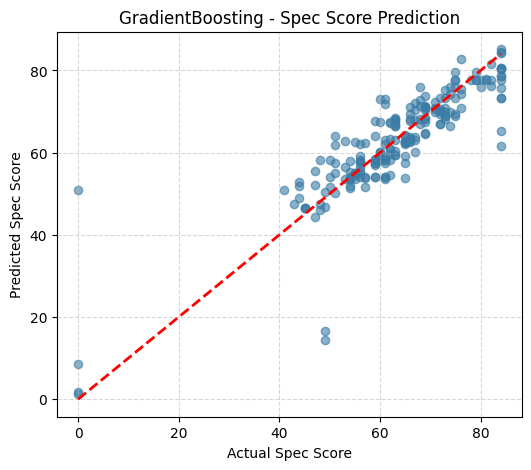

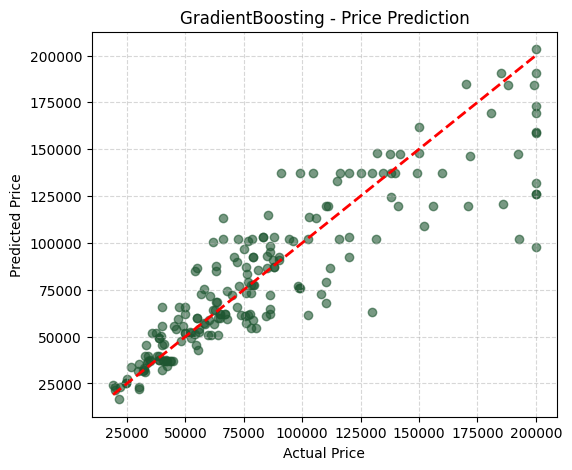

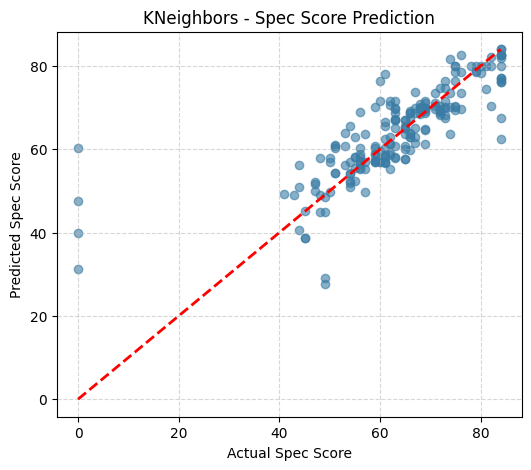

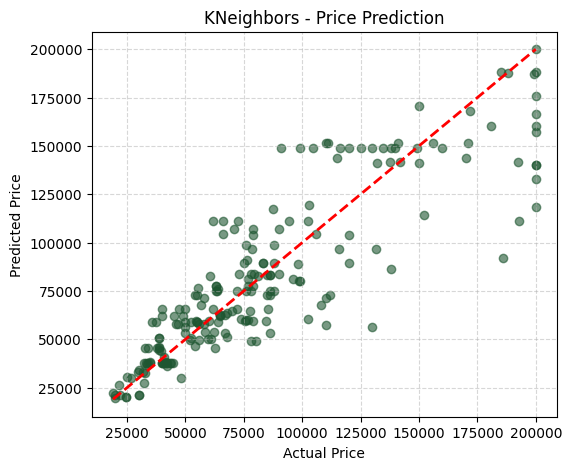

In [170]:
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Plot Actual vs Predicted for each model and each target separately
for name, model in models.items():
    
    # -------- Spec Score --------
    spec_pipe = Pipeline([
        ("scaler", StandardScaler()),
        ("estimator", model)
    ])
    spec_pipe.fit(X_spec_train, y_spec_train)
    y_spec_pred = spec_pipe.predict(X_spec_test)

    plt.figure(figsize=(6,5))
    plt.scatter(y_spec_test, y_spec_pred, alpha=0.6, color='#3A7CA5')
    plt.plot([y_spec_test.min(), y_spec_test.max()],
             [y_spec_test.min(), y_spec_test.max()],
             'r--', lw=2)
    plt.title(f'{name} - Spec Score Prediction')
    plt.xlabel('Actual Spec Score')
    plt.ylabel('Predicted Spec Score')
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.show()
    
    # -------- Price --------
    price_pipe = Pipeline([
        ("scaler", StandardScaler()),
        ("estimator", model)
    ])
    price_pipe.fit(X_price_train, y_price_train)
    y_price_pred = price_pipe.predict(X_price_test)

    plt.figure(figsize=(6,5))
    plt.scatter(y_price_test, y_price_pred, alpha=0.6, color='#1E5631')
    plt.plot([y_price_test.min(), y_price_test.max()],
             [y_price_test.min(), y_price_test.max()],
             'r--', lw=2)
    plt.title(f'{name} - Price Prediction')
    plt.xlabel('Actual Price')
    plt.ylabel('Predicted Price')
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.show()


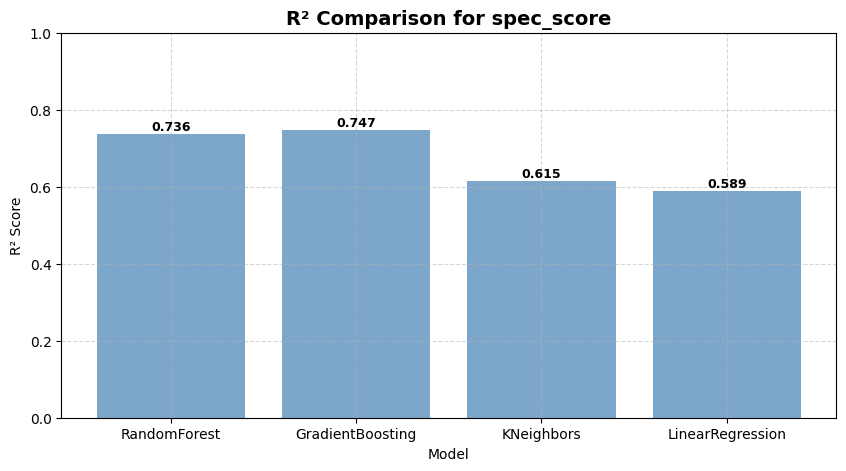

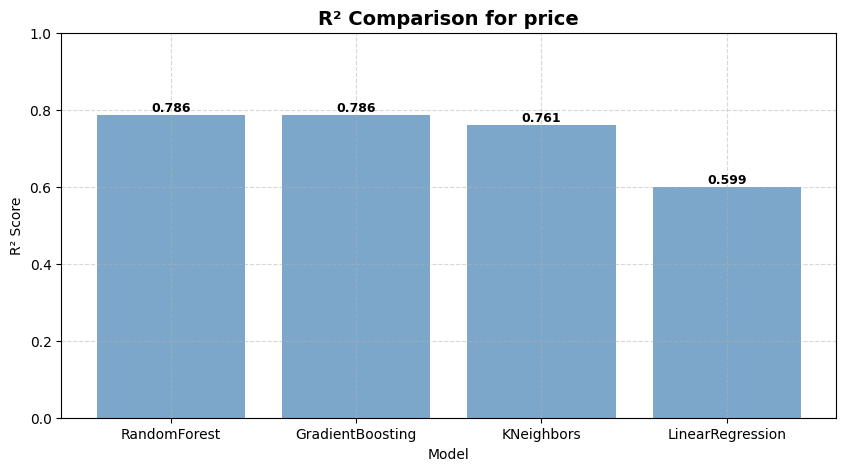

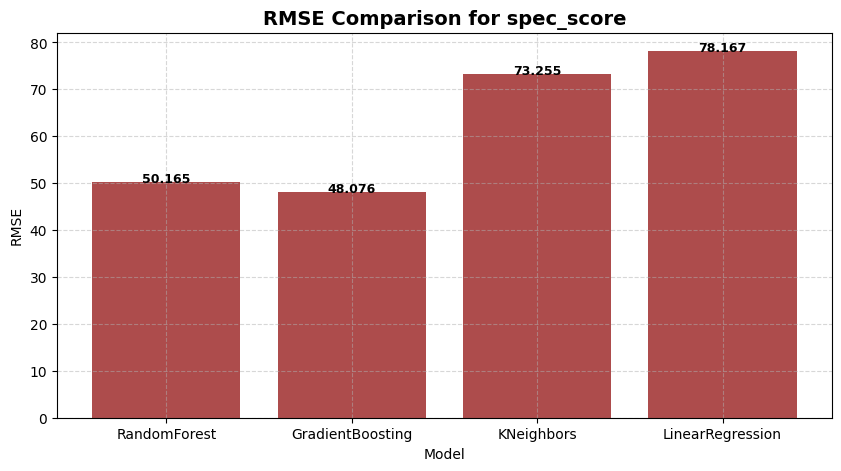

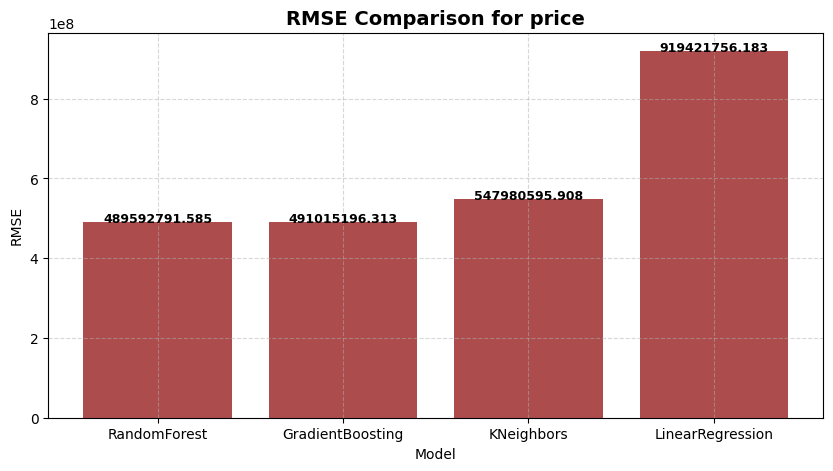

In [171]:
# --- Comparison of R² for each model and target ---
for col in y.columns:
    plt.figure(figsize=(10, 5))
    plt.bar(res_df['model'], res_df[f'r2_{col}'], color='#4682B4', alpha=0.7)
    plt.title(f'R² Comparison for {col}', fontsize=14, fontweight='bold')
    plt.xlabel('Model')
    plt.ylabel('R² Score')
    plt.ylim(0, 1)  # R² is usually between 0 and 1
    plt.grid(True, linestyle='--', alpha=0.5)
    for i, v in enumerate(res_df[f'r2_{col}']):
        plt.text(i, v + 0.01, f"{v:.3f}", ha='center', fontsize=9, fontweight='bold')
    plt.show()

# --- Comparison of RMSE for each model and target ---
for col in y.columns:
    plt.figure(figsize=(10, 5))
    plt.bar(res_df['model'], res_df[f'rmse_{col}'], color='#8B0000', alpha=0.7)
    plt.title(f'RMSE Comparison for {col}', fontsize=14, fontweight='bold')
    plt.xlabel('Model')
    plt.ylabel('RMSE')
    plt.grid(True, linestyle='--', alpha=0.5)
    for i, v in enumerate(res_df[f'rmse_{col}']):
        plt.text(i, v + 0.01, f"{v:.3f}", ha='center', fontsize=9, fontweight='bold')
    plt.show()

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# -------------------------------
# 1️⃣ Final model for spec_score
# -------------------------------
final_model_spec = Pipeline([
    ("scaler", StandardScaler()),  # scale features
    ("regressor", GradientBoostingRegressor(n_estimators=200, random_state=0))
])

# Train only on spec_score features
final_model_spec.fit(X_spec_train, y_spec_train)

# Optional: predict on test set to verify
y_spec_pred = final_model_spec.predict(X_spec_test)

# -------------------------------
# 2️⃣ Final model for price
# -------------------------------
final_model_price = Pipeline([
    ("scaler", StandardScaler()),  # scale features
    ("regressor", RandomForestRegressor(n_estimators=200, random_state=0, n_jobs=-1))
])

# Train only on price features
final_model_price.fit(X_price_train, y_price_train)

# Optional: predict on test set to verify
y_price_pred = final_model_price.predict(X_price_test)                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  
+
# -------------------------------
# 3️⃣ Print metrics
# -------------------------------
from sklearn.metrics import mean_squared_error, r2_score

# Spec score metrics
rmse_spec = mean_squared_error(y_spec_test, y_spec_pred)
r2_spec
= r2_score(y_spec_test, y_spec_pred)
print(f"Spec Score - RMSE: {rmse_spec:.3f}, R²: {r2_spec:.3f}")

# Price metrics
rmse_price = mean_squared_error(y_price_test, y_price_pred)
r2_price = r2_score(y_price_test, y_price_pred)
print(f"Price - RMSE: {rmse_price:.3f}, R²: {r2_price:.3f}")


Spec Score - RMSE: 48.076, R²: 0.747
Price - RMSE: 489592791.585, R²: 0.786


In [173]:
# exporting final models
import joblib

joblib.dump(final_model_spec, 'final_model_spec.pkl')
joblib.dump(final_model_price, 'final_model_price.pkl')

['final_model_price.pkl']